In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
model_names = ('ResNet50', 'ResNet50-dropout', 'SimpleCNN', 'InceptionV3')
model_paths = (os.path.join(name, f'{name}-log.csv') for name in model_names)

In [3]:
def collect_logs(model_names: tuple, model_paths: tuple, df: pd.DataFrame = None, sep:str = ';') -> pd.DataFrame:
    for name, path in zip(model_names, model_paths):

            if df is None:
                df = pd.read_csv(path, sep=sep)
                df['model'] = name
                df.set_index(['model', 'epoch'], inplace=True)
                continue
                
            log = pd.read_csv(path, sep=sep)
            log['model'] = name
            log.set_index(['model', 'epoch'], inplace=True)

            df = pd.concat([df, log])

    return df

In [4]:
df = collect_logs(model_names, model_paths)

In [5]:
df.head()

accuracy      loss  val_accuracy  val_loss
model    epoch                                            
ResNet50 0      0.921750  0.192282      0.971667  0.082222
         1      0.965750  0.087694      0.978333  0.053798
         2      0.975167  0.067033      0.985333  0.043157
         3      0.985417  0.039568      0.982333  0.043396
         4      0.989250  0.026989      0.983000  0.038033

In [6]:
df.shape

(200, 4)

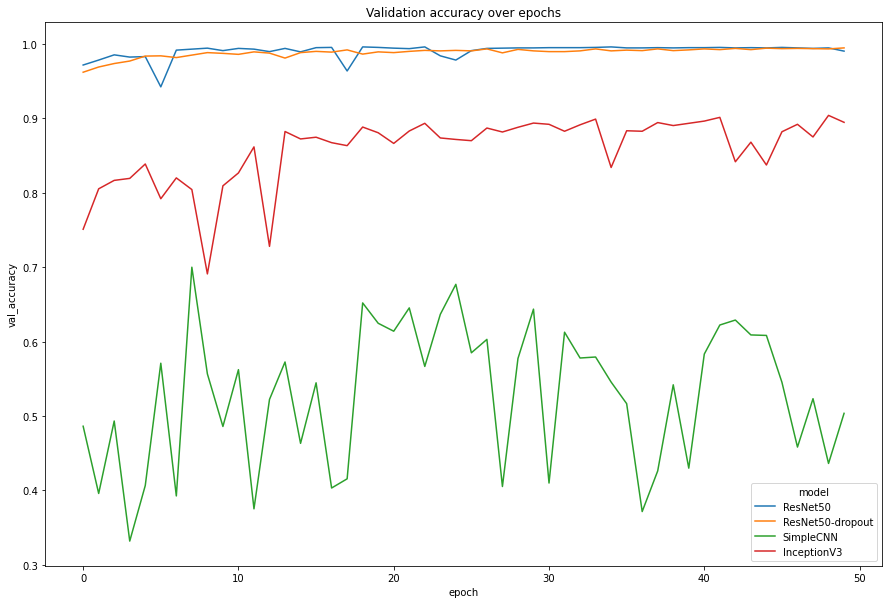

In [8]:
sns.lineplot(data=df, x='epoch', y='val_accuracy', hue='model')
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.title('Validation accuracy over epochs')
plt.show()